## Homework 1

In [29]:
# libraries
import numpy as np
import pandas as pd
import matplotlib

This is due on Thurs, 6/1

1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

In [53]:
def expandedPolynomial(x):
    return np.power(x,9) - 18 *np.power( x,8) + 144 *np.power( x,7) - 672 * np.power( x,6) + 2016 *np.power( x,5) - 4032 *np.power( x,4) + 5376 *np.power( x,3) - 4608 *np.power( x,2)  + 2304 *np.power( x,1) - 512

def polynomial(x):
    return np.power(x-2,9)

In [67]:
def tabulariseResults(expanded):
    index = []
    value = []
    x = 1.92
    while x < 2.080:
        index.append(x)
        if expanded :
            value.append(expandedPolynomial(x))
        else :
            value.append(polynomial(x))
        x = np.add(x,0.001)

    return pd.DataFrame({'value':value})

In [68]:
tabulariseResults(True).head()

,value
0,-1.346052e-10
1,-1.246008e-10
2,-1.173248e-10
3,-1.073204e-10
4,-7.821654e-11


<AxesSubplot:>

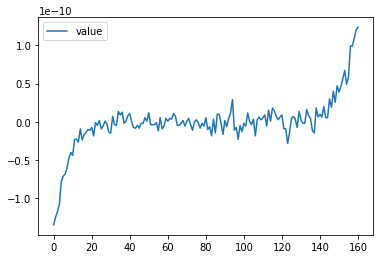

In [69]:
tabulariseResults(True).plot()

<AxesSubplot:>

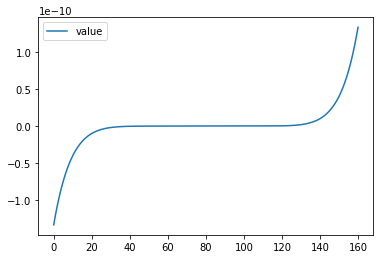

In [70]:
tabulariseResults(False).plot()

In [63]:
np.linspace(1.92, 2.08, 161)[1]

1.9209999999999998

In [64]:
# c) Difference due to floating point precision, can't increment by exactly 0.001

2\. How many different double-precision numbers are there?  Express your answer using powers of 2

3\. Using the updated [Numbers Every Programmer Should Know](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), how much longer does a main memory reference take than an L1 cache look-up?  How much longer does a disk seek take than a main memory reference?

In [ ]:
# L1 cache reference: 1ns
# Main Memory = 100ns
# 100x

# Disk Seek: 2,000,000ns
# 20,000x

4\. From the Halide Video, what are 4 ways to traverse a 2d array?

Scan Line order, sequentially across y, then sequentially across x (row traverse) 
We can transpose x and y, so we get a column traverse

Scan line order, but do x in vectors of 4

Distribute scanlines across threads so we have parrallel y and vectorize x by 4

Split x and y dimensions into tiles (e.g. split x by 4 and split y by 4)

5\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

  a. <img src="images/Halide1.gif" alt="Halide" style="width: 70%"/>
  
  b. <img src="images/Halide2.gif" alt="Halide" style="width: 70%"/>
  
  c. <img src="images/Halide3.gif" alt="Halide" style="width: 70%"/>

a) Computes all inputs ahead of time, before starting the output
Poor locality, by the time we start computing the output, the required inputs have been removed from cache (limited by system memory)

b) Maximum locality, use inputs for output immediately
Lots of redundant calculations, the blurred in x stage is recomputed many times

c) We've allocated enough memory to store all the intermediate stage
We have locality and no redundant calculations
Introduced serial dependence, we need scanline n-1, to compute scanline n
Cannot parrallelise

6\. Prove that if $A = Q B Q^T$ for some orthnogonal matrix $Q$, the $A$ and $B$ have the same singular values.

$A = Q B Q^T$

$AQ = Q B Q^TQ$

$Q^TAQ = Q^TQ B I$

$Q^TAQ = I B$

$Q^TAQ = B$

7\. What is the *stochastic* part of *stochastic gradient descent*?

You calculate the gradient on random batches, and so the gradient is not predetermined. Depends on what's in the batches and the order